In [1]:
### Import library & data set
# library
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import random
import matplotlib.pyplot as plt

Mounted at /content/drive


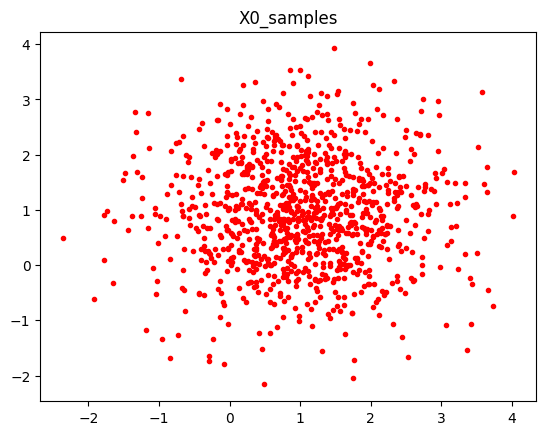

<ipython-input-45-e036403a8bc8>:25: RuntimeWarning: covariance is not positive-semidefinite.
  X0_samples = np.random.multivariate_normal(new_mu,new_cov,1000)
<ipython-input-45-e036403a8bc8>:37: RuntimeWarning: covariance is not positive-semidefinite.
  X1_samples = np.random.multivariate_normal(new_mu,new_cov,1000)


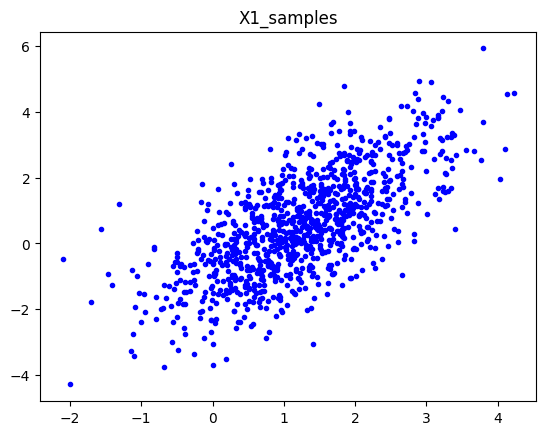

In [45]:
### gibbs sampling
mu = np.array([1,1])
cov = [[1,0],[0,1]]
X0_samples = np.random.multivariate_normal(mu,cov,1000)
plt.scatter(X0_samples[:,0],X0_samples[:,1],c="r",marker=".")
plt.title("X0_samples")
plt.show()

"""
generate X1
fix x_0, generate x_1 probabilty=p(x_1|x_0)
fix x_1, generate x_2 probability=p(x_0|x_1)
combine x_0,x_1
"""

# fix x_0
mu_0 = 1
mu_1 = np.random.choice(X0_samples[:,1])
new_mu = [mu_0,mu_1]
cov_0 = [1,0]
cov_1 = np.random.choice(X0_samples[:,1], 2)
new_cov = [cov_0,cov_1]

# combine new sample
X0_samples = np.random.multivariate_normal(new_mu,new_cov,1000)

# fix x_1
mu_1 = np.mean(X0_samples[:,1])
mu_0 = np.random.choice(X0_samples[:,0])
new_mu = [mu_0,mu_1]
cov_1 = np.cov(X0_samples[:,0],X0_samples[:,1])
cov_1 = cov_1[1]
cov_0 = np.random.choice(X0_samples[:,0],2)
new_cov = [cov_0,cov_1]

# combine new sample
X1_samples = np.random.multivariate_normal(new_mu,new_cov,1000)
plt.scatter(X1_samples[:,0],X1_samples[:,1],c="b",marker=".")
plt.title("X1_samples")
plt.show()